In [1]:
from fastai.vision.all import *

/Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <2A8DB508-8AAF-3FF1-BDFE-9EF17CC2B482> /Users/smorrin/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
path = Path.cwd() / "archive" / "images_train_test_val"

In [3]:
categories = [
    "agricultural",
    "buildings",
    "denseresidential",
    "forest",
    "mediumresidentail",
    "mobilehomepark",
    "river",
    "sparseresidential",
    "storagetanks"
]

used_labels = ["agricultural", "forest", "river"]

In [4]:
def get_images(path):
    return [fn for fn in get_image_files(path) if parent_label(fn) in categories]

def label_func(path):
    label = parent_label(path)
    return label if label in used_labels else "residential"

In [5]:
block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_y=label_func,
    get_items=get_images,
    splitter=GrandparentSplitter(valid_name="validation"),
    item_tfms=Resize(224)
)

In [6]:
dls = block.dataloaders(path)

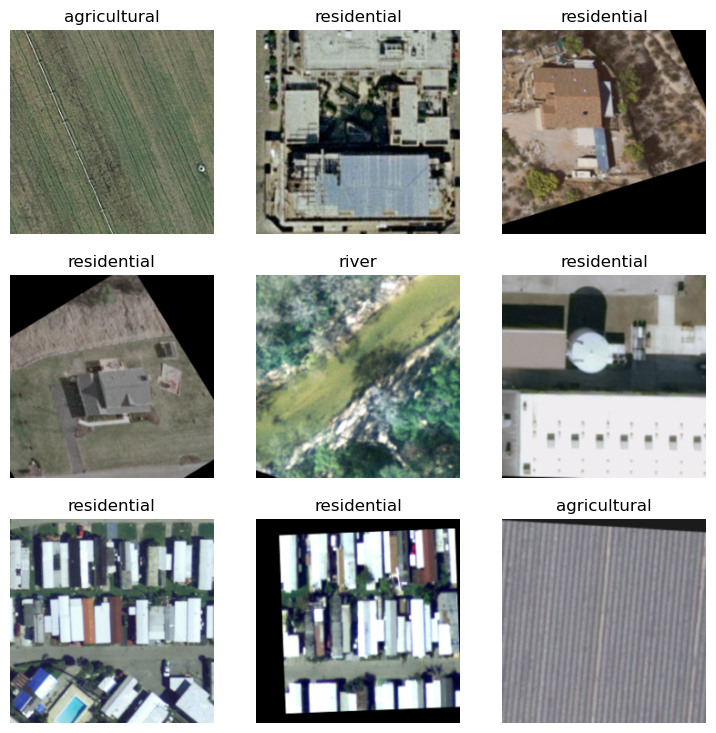

In [7]:
dls.show_batch()

In [8]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

In [9]:
learner.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.713645,0.129472,0.965000,01:20


epoch,train_loss,valid_loss,accuracy,time
0,0.069213,0.008313,0.997500,04:04
1,0.034511,0.014176,0.996250,03:46
2,0.032358,0.005195,0.998750,02:41
3,0.016248,0.004187,0.998750,03:17
4,0.009040,0.004275,0.998750,02:28


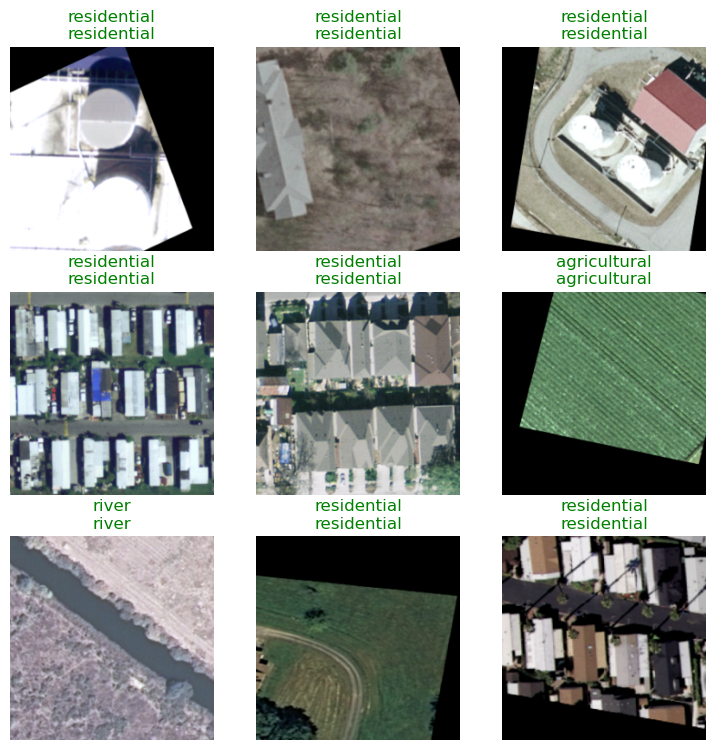

In [10]:
learner.show_results()

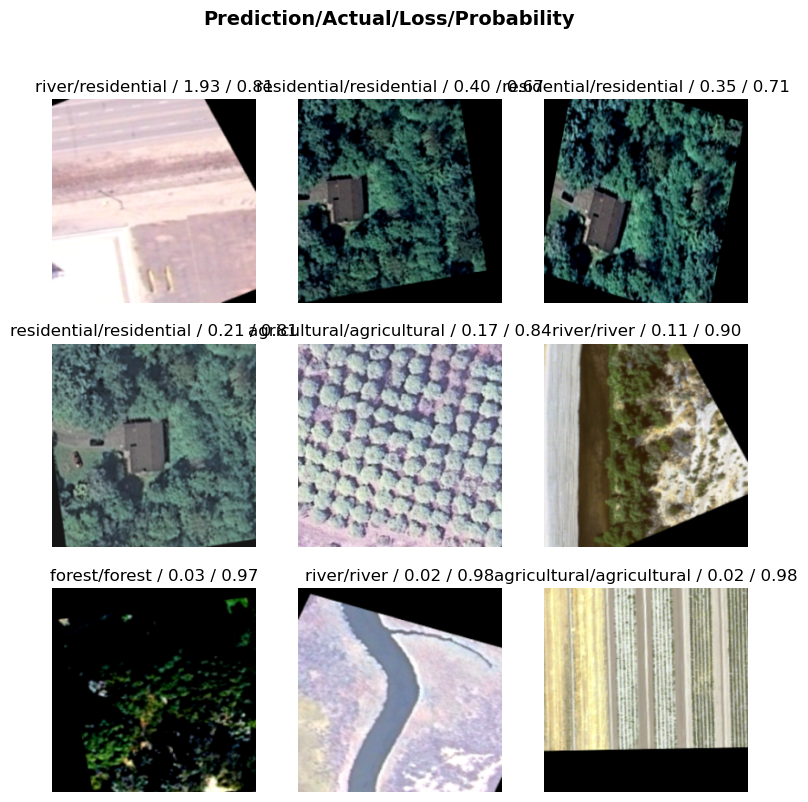

In [11]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9)

In [12]:
learner.export(Path.cwd() / "resnet50_class.pkl")